## Time series analysis of T2*-weighted EPI data 

* Calculation of standard deviation across all of the time points
* Calculation of standard deviation across steady-state time points
* Segmentation of CSF and brain tissue of EPI data

In [1]:
push!(LOAD_PATH,"library");
using PyPlot
using NK_tools
using Read_NIfTI1_real

In [2]:
filename = "/xdisk/nkchen/PBIA6_29156_20160705_092150_22528_magnitude_mcf.nii.gz";
headerinfo = load_niigz_header(filename); 
data = load_niigz_data(filename, headerinfo);
println("data size : ", size(data))
print("type of data: ", typeof(data))

data size : (78, 128, 128, 104)
type of data: Array{Float32,4}

In [3]:
data = flipdim(permutedims(data,[2,1,3,4]),1);

In [4]:
dataR = flipdim(permutedims(data,[3,1,2,4]),1);

119808119808119808196608

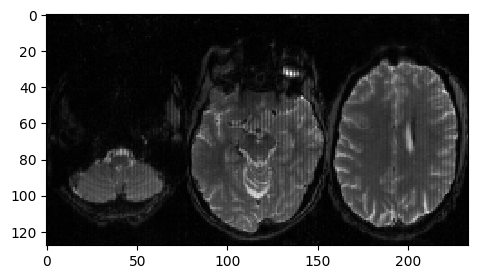

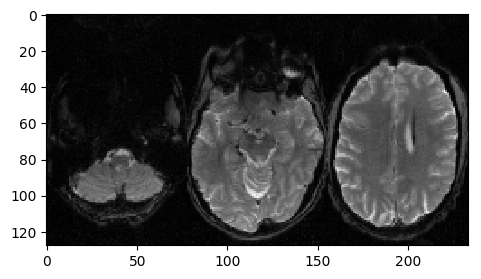

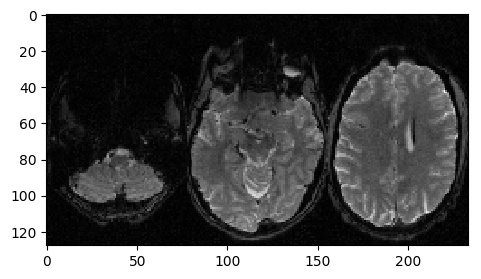

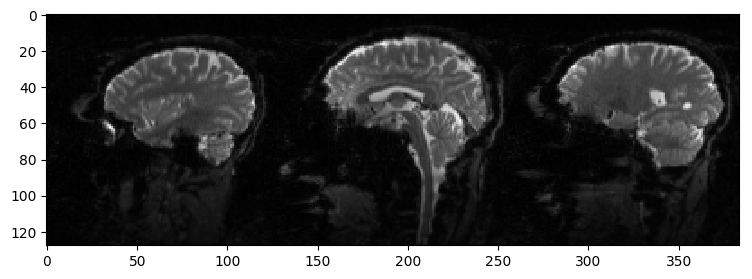

In [5]:
figure(1,figsize=(10,3));imal(data[:,:,[50,70,90],1],3,1);
figure(2,figsize=(10,3));imal(data[:,:,[50,70,90],2],3,1);
figure(3,figsize=(10,3));imal(data[:,:,[50,70,90],60],3,1);
figure(4,figsize=(10,3));imal(dataR[:,:,[20,40,50],1],3,1);

* Calculating standard deviation across time points (i.e., along the __4th__ dimension of data)

119808119808

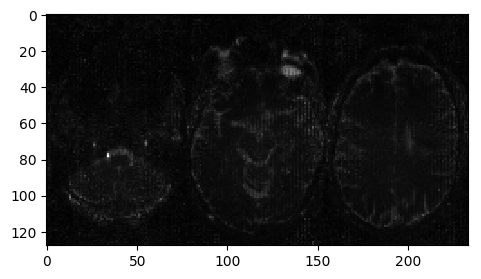

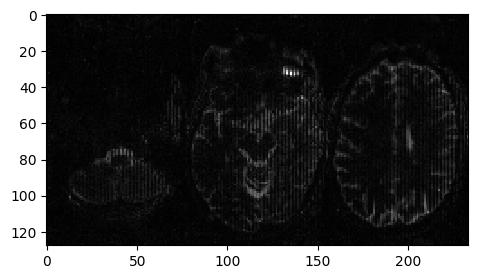

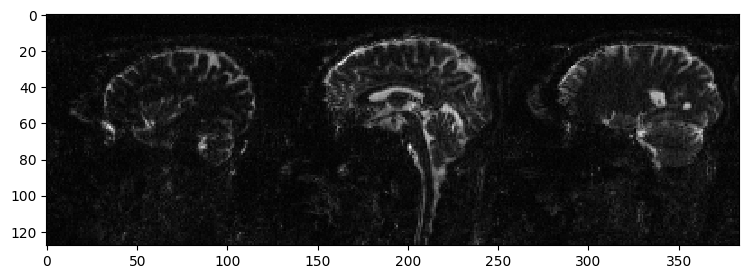

196608

In [6]:
stdMapAll = std(data,4);
stdMap1to6 = std(data[:,:,:,1:6],4);
stdMap1to6R = flipdim(permutedims(stdMap1to6,[3,1,2,4]),1);
figure(1,figsize=(10,3));imal(stdMapAll[:,:,[50,70,90],1],3,1);
figure(2,figsize=(10,3));imal(stdMap1to6[:,:,[50,70,90],1],3,1);
figure(3,figsize=(9,3));imal(stdMap1to6R[:,:,[20,40,50],1],3,1);

119808119808119808196608

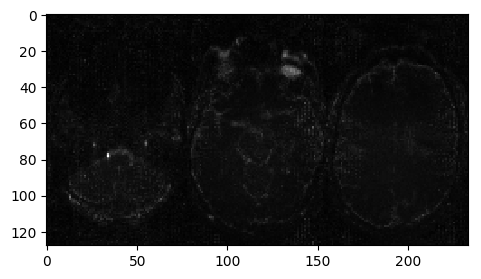

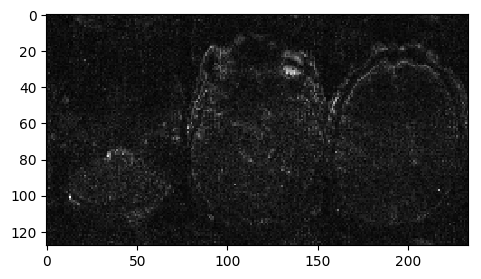

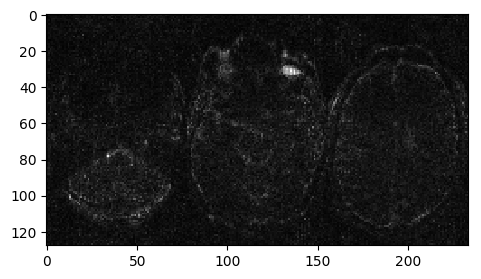

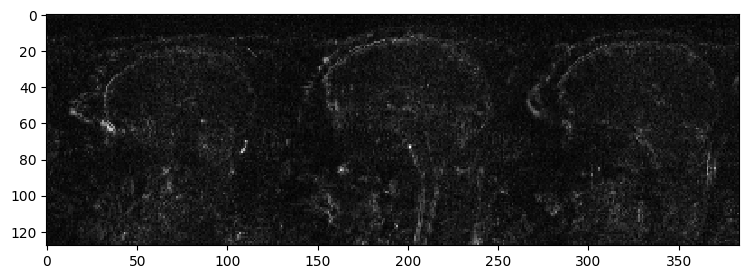

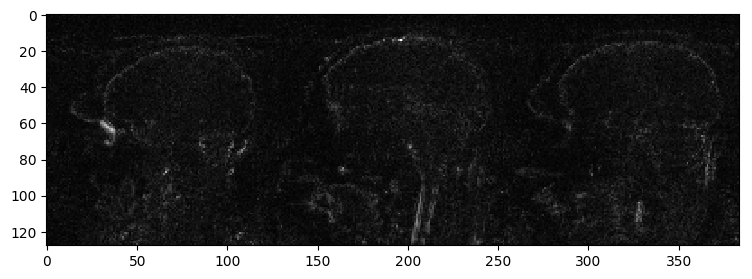

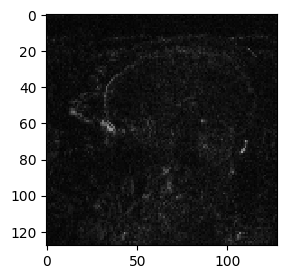

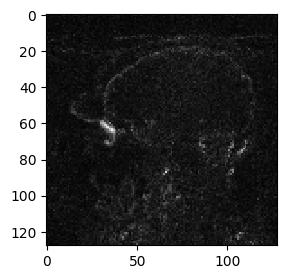

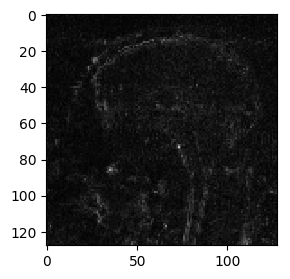

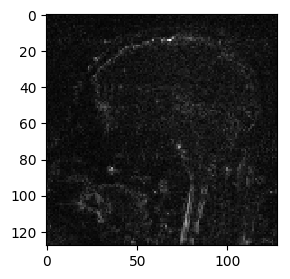

196608

In [7]:
stdMap2toEnd = std(data[:,:,:,2:end],4);
stdMap2to7 = std(data[:,:,:,2:7],4);
stdMap2to7R = flipdim(permutedims(stdMap2to7,[3,1,2,4]),1);
stdMapRandom6 = std(data[:,:,:,[4,24,44,64,84,104]],4);
stdMapRandom6R = flipdim(permutedims(stdMapRandom6,[3,1,2,4]),1);
figure(1,figsize=(10,3));imal(stdMap2toEnd[:,:,[50,70,90],1],3,1);
figure(2,figsize=(10,3));imal(stdMap2to7[:,:,[50,70,90],1],3,1);
figure(3,figsize=(10,3));imal(stdMapRandom6[:,:,[50,70,90],1],3,1);
figure(4,figsize=(10,3));imal(stdMap2to7R[:,:,[20,40,50],1],3,1);
figure(5,figsize=(10,3));imal(stdMapRandom6R[:,:,[20,40,50],1],3,1);
figure(6,figsize=(3,3));imshow(stdMap2to7R[:,:,20,1],cmap="gray",vmin=0,vmax=3000);
figure(7,figsize=(3,3));imshow(stdMapRandom6R[:,:,20,1],cmap="gray",vmin=0,vmax=3000);
figure(8,figsize=(3,3));imshow(stdMap2to7R[:,:,40,1],cmap="gray",vmin=0,vmax=3000);
figure(9,figsize=(3,3));imshow(stdMapRandom6R[:,:,40,1],cmap="gray",vmin=0,vmax=3000);


### Sources of signal fluctuation over time
* T1 effect from slice cross talk
* Difference in T1 values across tissue types
* Head motion
* Eye movement 
* Other physiological signal fluctuation
* Nyquist artifact
* Functional signals

__*Can you identify those sources from the images?*__

__*Can we use the above images for CSF segmentation?*__

